In [1]:
# Run this cell to install mlflow
!pip install mlflow

In [2]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
data_path = '/content/drive/MyDrive/datasets/london_weather.csv'
weather = pd.read_csv(data_path)

# Start coding here
# Use as many cells as you like

## **1) Data Understanding**

In [3]:
# Determine the column names, data types, number of non-null vales
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## **2) Data Cleaning**

In [4]:
# Converting into date time type
weather["date"] = pd.to_datetime(weather["date"], format='%Y%m%d')

In [5]:
# Extract the month anda year
weather["month"] = weather["date"].dt.month
weather["year"] = weather["date"].dt.year

In [6]:
# Check again
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
 10  month             15341 non-null  int32         
 11  year              15341 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(2)
memory usage: 1.3 MB


## **2) Exploratory Data Analysis**

<Axes: xlabel='year', ylabel='mean_temp'>

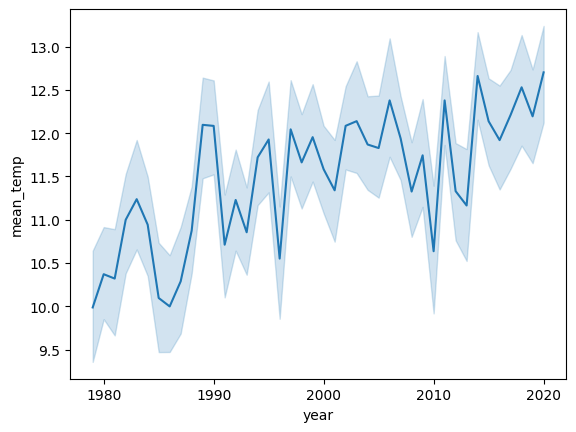

In [7]:
sns.lineplot(x='year', y='mean_temp', data=weather)  # Plot by year

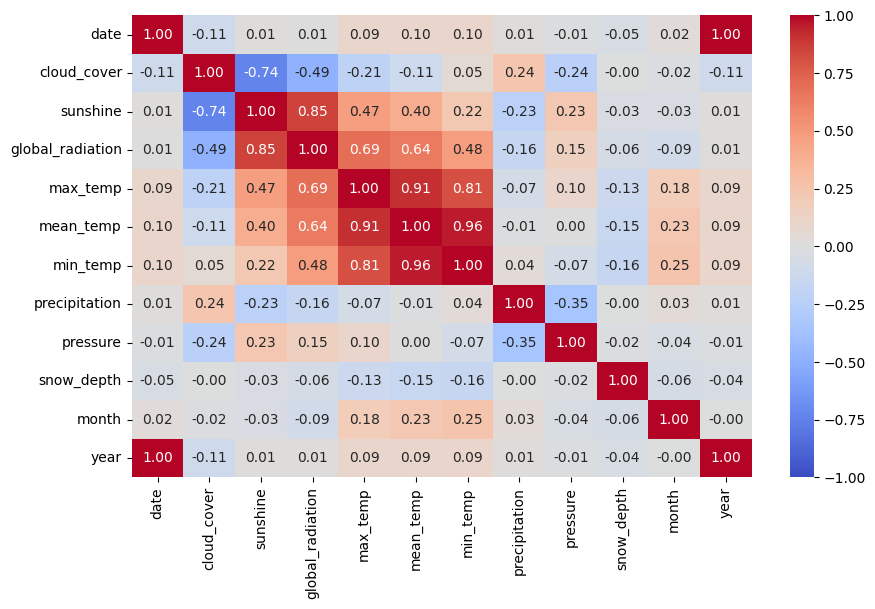

In [8]:
# Assuming your data is in a DataFrame named 'df'
correlation_matrix = weather.corr()  # Calculate correlation matrix

# Customize heatmap for readability
plt.figure(figsize=(10, 6))  # Adjust figure size for better viewing
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")  # Control colormap, min/max values, and format
plt.show()


Features that are positively correlated with the mean_temp are:


1.   min_temp
2.   max_temp
3.   global_radiation
4.   sunshine

Features that are negatively correlated with the mean_temp are:
1.   snow_depth
2.   cloud_cover



## **4) Feature Selection**

In [10]:
# Calculate the correlation matrix
correlation_matrix = weather.corr()

# Extract correlations with 'mean_temp'
mean_temp_correlations = correlation_matrix["mean_temp"].drop("mean_temp")

# Define a threshold for strong correlation (e.g., absolute value above 0.5)
threshold = 0.5
strong_correlations = mean_temp_correlations[abs(mean_temp_correlations) > threshold]

# Make a list of the features with strong correlation
feature_selection = strong_correlations.index.tolist()

# Include 'mean_temp' in the list for filtering and then drop rows with NaN in 'mean_temp'
filtered_df = weather[feature_selection + ["mean_temp"]].dropna(subset=["mean_temp"])

# Separate features and target variable
X = filtered_df[feature_selection]
y = filtered_df['mean_temp']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15305 entries, 0 to 15340
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   global_radiation  15286 non-null  float64
 1   max_temp          15305 non-null  float64
 2   min_temp          15305 non-null  float64
dtypes: float64(3)
memory usage: 478.3 KB


In [12]:
y.info()

<class 'pandas.core.series.Series'>
Index: 15305 entries, 0 to 15340
Series name: mean_temp
Non-Null Count  Dtype  
--------------  -----  
15305 non-null  float64
dtypes: float64(1)
memory usage: 239.1 KB


## **5) Preprocess Data**

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Display the first few rows of the training set to confirm
print("Training set (first few rows):")
print(X_train_scaled[:5])

print("\nTest set (first few rows):")
print(X_test_scaled[:5])

Training set (first few rows):
[[-0.69791576  0.72683985  0.24563563]
 [ 0.8998472   0.78794277  0.78972258]
 [-0.72041946 -0.1286011   0.05801943]
 [ 2.36258795  0.92542435 -0.03578866]
 [-0.84418983  1.15456032  0.92105392]]

Test set (first few rows):
[[ 1.13613609  0.91014862  0.03925781]
 [ 0.47227683  1.94889834  1.80285002]
 [-0.67541206 -1.2590052  -1.42414849]
 [ 1.1586398   0.48242815  0.39572858]
 [-0.67541206 -0.58687303 -0.18588162]]


In [21]:
# List of depths to try
depths = [1, 5, 10, 20]

# Train and log models with mlflow
for idx, depth in enumerate(depths):
    run_name = f"run_{idx}"

    with mlflow.start_run(run_name=run_name):
        # Linear Regression
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        mlflow.sklearn.log_model(lr, f"linear_regression_{run_name}")

        # Decision Tree Regressor
        dt = DecisionTreeRegressor(max_depth=depth)
        dt.fit(X_train_scaled, y_train)
        mlflow.sklearn.log_model(dt, f"decision_tree_depth_{depth}_{run_name}")

        # Log metrics (e.g., R2 score)
        lr_train_score = lr.score(X_train_scaled, y_train)
        lr_test_score = lr.score(X_test_scaled, y_test)
        dt_train_score = dt.score(X_train_scaled, y_train)
        dt_test_score = dt.score(X_test_scaled, y_test)

        # Predictions
        lr_train_pred = lr.predict(X_train_scaled)
        lr_test_pred = lr.predict(X_test_scaled)
        dt_train_pred = dt.predict(X_train_scaled)
        dt_test_pred = dt.predict(X_test_scaled)

        # Calculate RMSE
        lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
        lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
        dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_pred))
        dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))


        mlflow.log_metric("lr_train_score", lr_train_score)
        mlflow.log_metric("lr_test_score", lr_test_score)
        mlflow.log_metric("dt_train_score", dt_train_score)
        mlflow.log_metric("dt_test_score", dt_test_score)

        mlflow.log_metric("lr_train_rmse", lr_train_rmse)
        mlflow.log_metric("lr_test_rmse", lr_test_rmse)
        mlflow.log_metric("dt_train_rmse", dt_train_rmse)
        mlflow.log_metric("dt_test_rmse", dt_test_rmse)


        # Print metrics and predictions
        print(f"Run: {run_name}, Depth: {depth}")
        print(f"Linear Regression - Train RMSE: {lr_train_rmse:.4f}, Test RMSE: {lr_test_rmse:.4f}")
        print(f"Decision Tree - Train RMSE: {dt_train_rmse:.4f}, Test RMSE: {dt_test_rmse:.4f}")

        # Print predictions
        print(f"Linear Regression - Train Predictions: {lr_train_pred[:5]}")
        print(f"Linear Regression - Test Predictions: {lr_test_pred[:5]}")
        print(f"Decision Tree - Train Predictions: {dt_train_pred[:5]}")
        print(f"Decision Tree - Test Predictions: {dt_test_pred[:5]}")


Run: run_0, Depth: 1
Linear Regression - Train RMSE: 0.9108, Test RMSE: 0.8983
Decision Tree - Train RMSE: 3.3918, Test RMSE: 3.4070
Linear Regression - Train Predictions: [13.2437186  16.43602663 11.04384059 14.5144011  16.43186989]
Linear Regression - Test Predictions: [13.97424297 21.98083769  3.53688654 14.59209578  9.3623338 ]
Decision Tree - Train Predictions: [16.29957706 16.29957706  7.05005527  7.05005527 16.29957706]
Decision Tree - Test Predictions: [ 7.05005527 16.29957706  7.05005527 16.29957706  7.05005527]
Run: run_1, Depth: 5
Linear Regression - Train RMSE: 0.9108, Test RMSE: 0.8983
Decision Tree - Train RMSE: 1.2248, Test RMSE: 1.2616
Linear Regression - Train Predictions: [13.2437186  16.43602663 11.04384059 14.5144011  16.43186989]
Linear Regression - Test Predictions: [13.97424297 21.98083769  3.53688654 14.59209578  9.3623338 ]
Decision Tree - Train Predictions: [14.3928047  15.77898894 10.84993548 12.82307692 16.28915663]
Decision Tree - Test Predictions: [12.8230

In [22]:
# Retrieve experiment results
experiment_results = mlflow.search_runs()
print(experiment_results.head())

                             run_id experiment_id    status  \
0  e5b9414d0b254d838586d74450ab4ce2             0  FINISHED   
1  f59bd252a5474d819931552d5f0a8441             0  FINISHED   
2  e5297a13d15544228bd587a6c520cf97             0  FINISHED   
3  556bc5e3eacf483aba87d3d9796a3c3a             0  FINISHED   
4  278c0451a5e74b7882c6c6e7fe7e12b2             0    FAILED   

                                        artifact_uri  \
0  file:///content/mlruns/0/e5b9414d0b254d838586d...   
1  file:///content/mlruns/0/f59bd252a5474d8199315...   
2  file:///content/mlruns/0/e5297a13d15544228bd58...   
3  file:///content/mlruns/0/556bc5e3eacf483aba87d...   
4  file:///content/mlruns/0/278c0451a5e74b7882c6c...   

                        start_time                         end_time  \
0 2024-06-22 09:20:49.081000+00:00 2024-06-22 09:20:54.268000+00:00   
1 2024-06-22 09:20:43.033000+00:00 2024-06-22 09:20:49.075000+00:00   
2 2024-06-22 09:20:37.302000+00:00 2024-06-22 09:20:43.020000+00:00   
